Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [2]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols, parse_dates=['SALE DATE'], index_col='SALE DATE')
    df.columns = [col.replace(' ', '_') for col in df]
    cols_to_change = ['SALE_PRICE'] 
    for col in cols_to_change:
      df[col] = df[col].str.replace('[$,]', '')
      df[col] = df[col].str.replace('[-,]', '')
    convert_dtype = {'BOROUGH': object,
                 'SALE_PRICE': int, }
    df = df.astype(convert_dtype)
    df = df[df['BUILDING_CLASS_CATEGORY']== '01 ONE FAMILY DWELLINGS' ]
    df = df[(df['SALE_PRICE'] >= 100000) & (df['SALE_PRICE'] <=2000000)]
    

    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [3]:
import numpy as np
import pandas as pd
df = wrangle(filepath)
print(df.shape)
df.head()

(3164, 6)


,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [4]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

df.shape

(3164, 6)

In [5]:
# remove the dollar sign on the sale price
#perform some data visualization


In [6]:


df.dtypes

BOROUGH                     object
NEIGHBORHOOD                object
BUILDING_CLASS_CATEGORY     object
GROSS_SQUARE_FEET          float64
YEAR_BUILT                 float64
SALE_PRICE                   int64
dtype: object

In [7]:
print('The unique values of neigbourhood is:', df['NEIGHBORHOOD'].nunique())
print('The unique values of Borough is:', df['BOROUGH'].nunique())

The unique values of neigbourhood is: 185
The unique values of Borough is: 5


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [8]:
target = 'SALE_PRICE'
X = df.drop(columns=target)
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [9]:
cutoff = '2019-01-02'
mask = X.index < cutoff

In [10]:
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [11]:
#import the class MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 175000.0


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [12]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(use_cat_names = True)

ohe.fit(X_train)

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [13]:
from sklearn.linear_model import LinearRegression, Ridge
model_lr = LinearRegression()
model_lr.fit(XT_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [14]:
model_r = Ridge()
model_r.fit(XT_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [15]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 1.1641532182693481e-10
Linear Test MAE: 354918.3042198624


**Task 10:** Check the training and test metrics for `model_r`.

In [16]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test, model_r.predict(XT_test))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 0.7657269373885356
Ridge Test MAE: 354917.6623230348


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [17]:
# Caculate R^2 score for Linear Regression model
training_r_2 = mean_squared_error(y_train, model_lr.predict(XT_train), squared=True)
test_r_2 = mean_squared_error(y_test, model_lr.predict(XT_test), squared=True)
print('Linear Training R^2:', training_r_2)
print('Linear Test R^2:', test_r_2)

Linear Training R^2: 2.710505431213761e-20
Linear Test R^2: 286610161595.3472


In [18]:
# Caculate R^2 score for Ridge model
training_r_2 = mean_squared_error(y_train, model_r.predict(XT_train), squared=True)
test_r_2 = mean_squared_error(y_test, model_r.predict(XT_test), squared=True)
print('Ridge Training R^2:', training_r_2)
print('Ridge Test R^2:', test_r_2)

Ridge Training R^2: 0.5863377426424263
Ridge Test R^2: 286609126599.83575


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

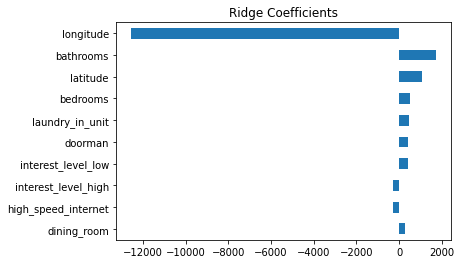

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

In [23]:
import seaborn as sns
coefs = model_r.coef_                                

In [24]:
XT_train.columns

Index(['BOROUGH_3.0', 'BOROUGH_4.0', 'NEIGHBORHOOD_OCEAN PARKWAY-NORTH',
       'NEIGHBORHOOD_QUEENS VILLAGE',
       'BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS', 'GROSS_SQUARE_FEET',
       'YEAR_BUILT'],
      dtype='object')

In [28]:
print(len(coefs))
print(len(X_train.columns))

7
5


In [41]:
pd.Series(coefs, index = XT_train.columns)

BOROUGH_3.0                                          0.765727
BOROUGH_4.0                                         -0.765727
NEIGHBORHOOD_OCEAN PARKWAY-NORTH                     0.765727
NEIGHBORHOOD_QUEENS VILLAGE                         -0.765727
BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS      0.000000
GROSS_SQUARE_FEET                                 -517.631410
YEAR_BUILT                                          -7.657269
dtype: float64

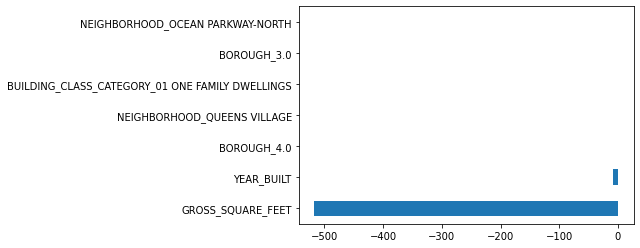

In [40]:
pd.Series(coefs, index = XT_train.columns).sort_values().plot(kind = 'barh')